### 5.2 数据清洗

### 5.2.1 缺失值清洗 
#### 1、缺失值处理方法
    - 对于记录中缺失值的处理，最常用的方法有删除法、替换法和插补法。
    - (1) 删除法是指将缺失值所在的观测记录删除（前提是缺失记录的比例非常低，如5%以内），或者删除缺失值所对应的属性（前提是该属性中包含的缺失值比例非常高，如70%左右）。
    - (2) 替换法是指直接利用缺失变量的均值、中位数或众数替换该变量中的缺失值，其好处是缺失值的处理速度快，弊端是易产生有偏估计，导致缺失值替换的准确性下降。例如，假定电商信息表中顾客收入的数据分布是对称的，并且平均收入为 56000 元，则使用该值替换“收入”属性中的缺失值。
    - (3) 插补法则是利用有监督的机器学习方法（如回归模型、树模型、网络模型等）对缺失值作预测，其优势在于预测的准确性高，缺点是需要大量的计算，导致缺失值的处理速度大打折扣。例如，利用数据集中其他顾客的属性，可以构造一棵决策树，来预测缺失值。
- 注意:在某些情况下，缺失值并不意味着数据有错误。如申请信用卡时，要求申请人提供工作单位，刚毕业的大学生没有工作单位就自然地不填写该属性了。

####  2. pandas处理缺失值

In [1]:
# (1) 缺失值的检测与统计
# 函数isnull()（或notnull()）可以直接判断该列中的哪个数据为 NaN，缺失值为True（或False），非缺失值为False（或True）。方法info()和sum()分别查看非缺失值的信息和统计出各列缺失值的数量。
# 例5.1 缺失值检和统计测示例。
import numpy as np
import pandas as pd
df=pd.DataFrame([['S1','许文秀','女',21,'团员','计算机系','湖北'],
                 ['S2','刘德峰','男',20,np.NaN,'信息系','贵州'],
                 ['S3','刘世元','男',22,np.NaN,'计算机系',np.NaN],
                 ['S4','于金凤','女',np.NaN,np.NaN,'电信系',np.NaN],
                 ['S5','周新娥','女',23,'团员','电信系',np.NaN],
                 ['S6','王晓晴','女',22,np.NaN,np.NaN,np.NaN]],
                columns=['学号','姓名','性别','年龄','政治面貌','系部','籍贯']) 
print(df)
print(df.info()) #打印出各列数据的非缺失值信息
print(df.isnull()) #打印出缺失值信息，缺失值为True，非缺失值为False
print(df.isnull().sum()) #打印出各列中缺失值的数量

   学号   姓名 性别    年龄 政治面貌    系部   籍贯
0  S1  许文秀  女  21.0   团员  计算机系   湖北
1  S2  刘德峰  男  20.0  NaN   信息系   贵州
2  S3  刘世元  男  22.0  NaN  计算机系  NaN
3  S4  于金凤  女   NaN  NaN   电信系  NaN
4  S5  周新娥  女  23.0   团员   电信系  NaN
5  S6  王晓晴  女  22.0  NaN   NaN  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   学号      6 non-null      object 
 1   姓名      6 non-null      object 
 2   性别      6 non-null      object 
 3   年龄      5 non-null      float64
 4   政治面貌    2 non-null      object 
 5   系部      5 non-null      object 
 6   籍贯      2 non-null      object 
dtypes: float64(1), object(6)
memory usage: 464.0+ bytes
None
      学号     姓名     性别     年龄   政治面貌     系部     籍贯
0  False  False  False  False  False  False  False
1  False  False  False  False   True  False  False
2  False  False  False  False   True  False   True
3  False  False  False   True   True  False   Tru

In [2]:
# (2) 删除缺失值
# 根据一定的规则将含有缺失值的行或列直接进行删除。dropna()为Pandas库中DataFrame的一个方法，用于删除缺失值。基本参数如下：
# dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
# 参数说明：
# ① axis: 默认为 axis=0，当某行出现缺失值时，将该行丢弃并返回；axis=1，当某列出现缺失值时，将该列丢弃。
# ② how：确定缺失值个数，缺省时 how=’any’，表明只要某行有缺失值就将该行丢弃，how=’all’表明某行全部为缺失值才将其丢弃。
# ③ thresh：阈值设定，当行列中非缺省值的数量少于给定的值就将该行丢弃
# ④ subset：部分标签中删除某行列，如：subset=[’a’,’d’], 即丢弃子列a、d 中含有缺失值的行。
# ⑤ inplace：bool 取值，默认 False, 当 inplace= True，即对原数据操作，无返回值。
# 例5.2 删除缺失值示例。
import numpy as np
import pandas as pd
df=pd.DataFrame([['S1','许文秀','女',21,'团员','计算机系','湖北'],
                 ['S2','刘德峰','男',20,np.NaN,'信息系','贵州'],
                 ['S3','刘世元','男',22,np.NaN,'计算机系',np.NaN],
                 ['S4','于金凤','女',np.NaN,np.NaN,'电信系',np.NaN],
                 ['S5','周新娥','女',23,'团员','电信系',np.NaN],
                 ['S6','王晓晴','女',22,np.NaN,np.NaN,np.NaN]],
                columns=['学号','姓名','性别','年龄','政治面貌','系部','籍贯']) 
print(df.dropna()) #删除含有缺失值的行
print(df.dropna(axis=1)) #删除含有缺失值的列
print(df.dropna(thresh=5)) #保留至少具有5个非NaN值的行
print(df.dropna(thresh=3,axis=1)) #保留至少具有3个非NaN值的列

   学号   姓名 性别    年龄 政治面貌    系部  籍贯
0  S1  许文秀  女  21.0   团员  计算机系  湖北
   学号   姓名 性别
0  S1  许文秀  女
1  S2  刘德峰  男
2  S3  刘世元  男
3  S4  于金凤  女
4  S5  周新娥  女
5  S6  王晓晴  女
   学号   姓名 性别    年龄 政治面貌    系部   籍贯
0  S1  许文秀  女  21.0   团员  计算机系   湖北
1  S2  刘德峰  男  20.0  NaN   信息系   贵州
2  S3  刘世元  男  22.0  NaN  计算机系  NaN
4  S5  周新娥  女  23.0   团员   电信系  NaN
   学号   姓名 性别    年龄    系部
0  S1  许文秀  女  21.0  计算机系
1  S2  刘德峰  男  20.0   信息系
2  S3  刘世元  男  22.0  计算机系
3  S4  于金凤  女   NaN   电信系
4  S5  周新娥  女  23.0   电信系
5  S6  王晓晴  女  22.0   NaN


In [4]:
# (3) 填充缺失值
# 直接删除缺失值的样本并不是一个很好的方法，因此可以用一个特定的值替换缺失值。缺失值所在的属性为数值型时，通常利用其均值、中位数和众数等描述其集中趋势的统计量来填充；缺失值所在属性为类别型数据时，则选择众数来填充。Pandas 库中提供了缺失值替换的方法 fillna()，常用形式如下：
# fillna(value=None,method=None,asxi=None,inplace=False,limit=None)
# 其中value 用于填充缺失值的标量值或字典对象；method表示插值方式，默认为’ffill’，向前填充，或是向下填充，而‘bfill’：向后填充，或是向上填充；axis表示待填充的轴，默认axis=0；inplace表示修改调用者对象而不产生副本；limit (对于前向和后向填充)可以连续填充的最大数量。
# 常见的填充方法
# ① 填充固定值：选取某个固定值/默认值填充缺失值。
# ② 填充均值：对每一列的缺失值，填充当列的均值。
# ③ 填充中位数：对每一列的缺失值，填充当列的中位数。
# ④ 填充众数：对每一列的缺失值，填充当列的众数。如果存在某列缺失值过多，众数为NaN的情况，这时就取每列删除掉NaN值后的众数。
# ⑤ 填充上下条的数据：对每一条数据的缺失值，填充其上下条数据的值。
# ⑥ 填充插值得到的数据：用插值法拟合出缺失的数据，然后进行填充。常用interpolate()函数默认采用线性插值，即假设函数是直线形式，缺失值用前一个值和后一个值的平均数填充。
# ⑦ 填充KNN数据：填充近邻的数据，先利用KNN计算临近的k个数据，然后填充他们的均值。
# ⑧ 填充模型预测的值：把缺失值作为新的Label，建立模型得到预测值，然后进行填充。
# 例5.3 填充缺失值示例。
import numpy as np
import pandas as pd
df=pd.DataFrame([['S1','许文秀','女',21,'团员','计算机系','湖北',387],
       ['S2','刘德峰','男',20,np.NaN,'信息系','贵州',376],
       ['S3','刘世元','男',22,np.NaN,'计算机系',np.NaN,380],
       ['S4','于金凤','女',np.NaN,np.NaN,'电信系',np.NaN,np.NaN],
       ['S5','周新娥','女',23,'团员','电信系',np.NaN,367],
       ['S6','王晓晴','女',22,np.NaN,np.NaN,np.NaN,np.NaN]],
columns=['学号','姓名','性别','年龄','政治面貌','系部','籍贯','总分']) 
print(df.fillna(-1)) #填充缺失值为'-1'
print(df.fillna(method='ffill')) #向下填充缺失值
print(df['年龄'].fillna(df['年龄'].mean())) #年龄列的缺失值用其均值填充
print(df.fillna(df.mode())) #利用众数填充缺失值
for n in df:                  
    df[n]=df[n].interpolate() #数值型属性用线性插值
    df[n].dropna(inplace=True)
print(df)

   学号   姓名 性别    年龄 政治面貌    系部  籍贯     总分
0  S1  许文秀  女  21.0   团员  计算机系  湖北  387.0
1  S2  刘德峰  男  20.0   -1   信息系  贵州  376.0
2  S3  刘世元  男  22.0   -1  计算机系  -1  380.0
3  S4  于金凤  女  -1.0   -1   电信系  -1   -1.0
4  S5  周新娥  女  23.0   团员   电信系  -1  367.0
5  S6  王晓晴  女  22.0   -1    -1  -1   -1.0
   学号   姓名 性别    年龄 政治面貌    系部  籍贯     总分
0  S1  许文秀  女  21.0   团员  计算机系  湖北  387.0
1  S2  刘德峰  男  20.0   团员   信息系  贵州  376.0
2  S3  刘世元  男  22.0   团员  计算机系  贵州  380.0
3  S4  于金凤  女  22.0   团员   电信系  贵州  380.0
4  S5  周新娥  女  23.0   团员   电信系  贵州  367.0
5  S6  王晓晴  女  22.0   团员   电信系  贵州  367.0
0    21.0
1    20.0
2    22.0
3    21.6
4    23.0
5    22.0
Name: 年龄, dtype: float64
   学号   姓名 性别    年龄 政治面貌    系部   籍贯     总分
0  S1  许文秀  女  21.0   团员  计算机系   湖北  387.0
1  S2  刘德峰  男  20.0  NaN   信息系   贵州  376.0
2  S3  刘世元  男  22.0  NaN  计算机系  NaN  380.0
3  S4  于金凤  女   NaN  NaN   电信系  NaN  387.0
4  S5  周新娥  女  23.0   团员   电信系  NaN  367.0
5  S6  王晓晴  女  22.0  NaN   NaN  NaN    NaN
   学号   姓名 性别    年龄 政治面貌  

### 5.2.2 异常值清洗 

#### 1. 异常值的检测

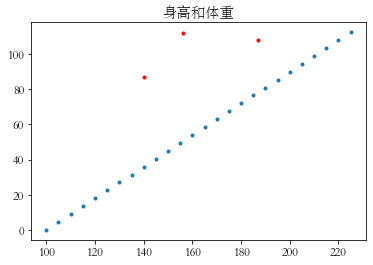

In [5]:
# (1) 简单统计分析
# 最常用的统计量是最大值和最小值，用来判断这个变量的取值是否超出合理的范围。如客户年龄的最大值为199岁，则该变量的取值存在异常。
# 例5.4 计算成年人的身高、体重公式为：Y=(X-100)×0.9，其中X为身高(cm)，Y为标准体重(kg)。
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(100,230,5) #假设成年人（18岁以上）正常高度在1米至2.3米
y=(x-100)*0.9
plt.rcParams['font.family']='STSong' #图形中显示汉字
plt.rcParams['font.size']=12
plt.title('身高和体重')
plt.plot(x,y,'.')
plt.plot(140,87,'r.') #异常值
plt.plot(156,112,'r.') #异常值
plt.plot(187,108,'r.')
plt.show()

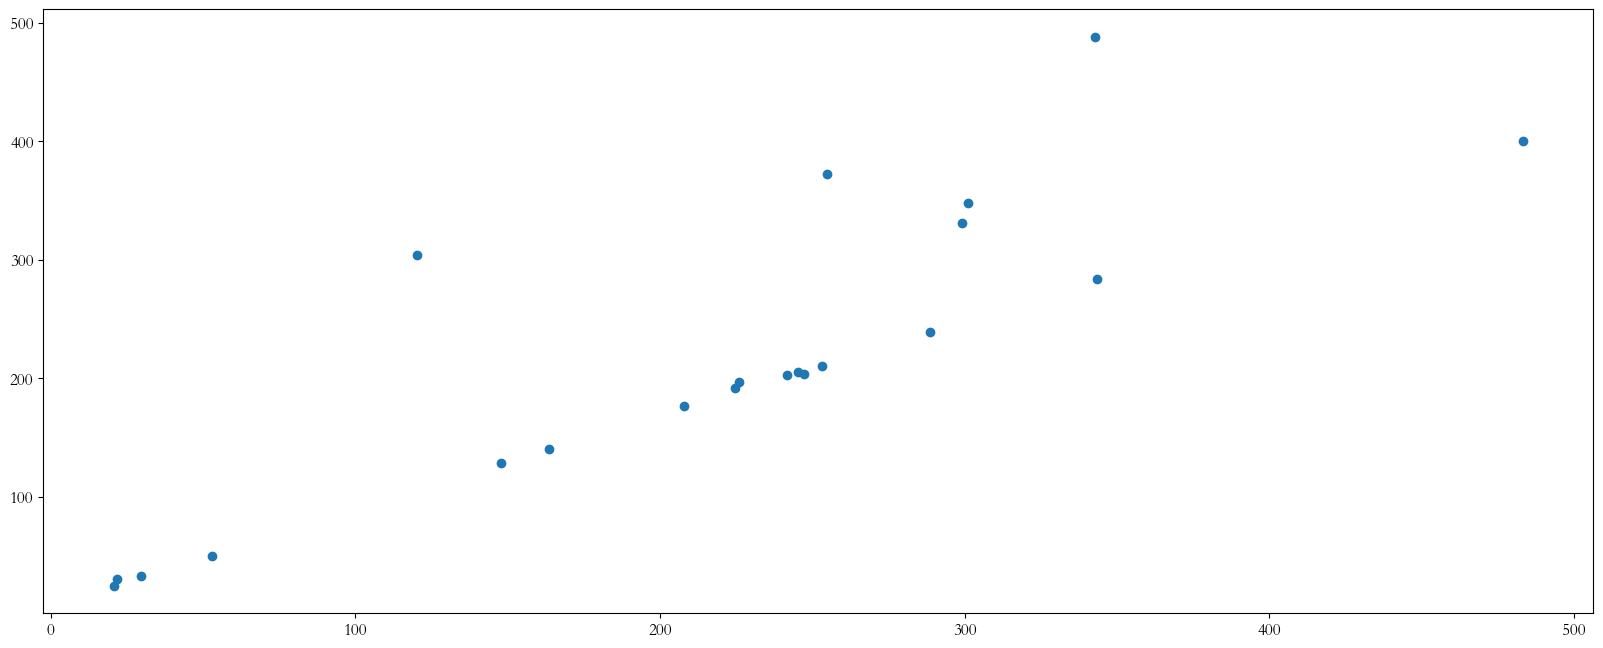

In [6]:
# (2) 散点图方法
# 通过数据分布的散点图可以检测异常数据。
# 例5.5 探究房屋面积和房屋价格的关系示例。
import matplotlib.pyplot as plt
import numpy as np
x = [225.98,247.07,253.14,254.85,241.58,301.01,20.67,288.64, 163.56,120.06,207.83,342.75,147.9,53.06,224.72,29.51,21.61,483.21, 245.25,299.25,343.35] #房屋面积数据
y = [196.63,203.88,210.75,372.74,202.41,347.61,24.9,239.34, 140.32,304.15,176.84,488.23,128.79,49.64,191.74,33.1,30.74,400.02,205.35,330.64,283.45] #房屋价格数据
plt.figure(figsize=(20, 8), dpi=100) #创建画布
plt.scatter(x, y) # 绘制散点图
plt.show()  # 显示图像

In [8]:
# (3) 3σ原则
# 在正态分布中，σ代表标准差,μ代表均值，x=μ即为图像的对称轴。
# 3σ原则为：数值分布在（μ-σ,μ+σ)中的概率为0.6827；数值分布在（μ-2σ,μ+2σ)中的概率为0.9544；数值分布在（μ-3σ,μ+3σ)中的概率为0.9974。可以认为，Y 的取值几乎全部集中在（μ-3σ,μ+3σ)]区间内，超出这个范围的可能性仅占不到0.3%，属于极个别的小概率事件，因此将超出（μ-3σ,μ+3σ)范围的值认为是异常值，图如图5.3所示。
# 3σ原则要求数据服从正态或近似正态分布，且样本数据大于10。
# 例5.6 3σ原则检测异常值示例。
import pandas as pd
data=[78,72,-14,70,68,72,77,78,42,78,74,54,80,82,65,62] #学生某门课程成绩
s=pd.Series(data) 
dmean=s.mean()
dstd=s.std()
print('检测出异常值：')
yz1=dmean-3*dstd
yz2=dmean+3*dstd
for i in range(0,len(data)):
    if (data[i]<yz1)or(data[i]>yz2):
        print(data[i],end=',')

检测出异常值：
-14,

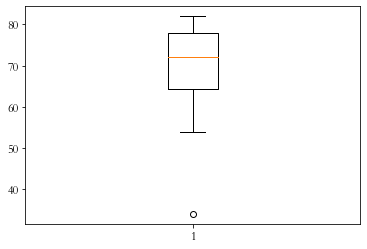

In [9]:
# (4) 箱线图
# 箱线图是通过数据集的四分位数形成的图形化描述，是非常简单而且效的可视化异常值的一种方法。
# 例5.7箱线图检测异常值示例。
import pandas as pd
import matplotlib.pyplot as plt
data=[78,72,34,70,68,72,77,78,56,78,74,54,80,82,65,62] 
s=pd.Series(data) 
plt.boxplot(x=s.values,whis=1.5)
plt.show()

#### 2. 异常值处理

- (1) 删除
- (2) 视为缺失值
- (3) 平均值修正
- (4) 盖帽法
- (5) 分箱法
- (6) 回归插补
- (7) 多重插补
- (8) 不处理

### 5.2.3 格式内容清洗 
- 一般情况下，数据是由用户/访客产生的，也就有很大的可能性存在格式和内容上不一致的情况，所以在进行模型构建之前需要先进行数据的格式内容清洗操作。格式内容问题主要有以下几类：
    - 时间、日期、数值、半角/全角字符等显示格式不一致：直接将数据转换为一类格式即可，该问题一般出现在多个数据源整合的情况下。
    - 内容中有不该存在的字符：最典型的就是在头部、中间、尾部的空格等问题，这种情况下，需要以半自动校验加半人工方式来找出问题，并去除不需要的字符。
    - 内容与该属性应有的内容不符：比如姓名写成了性别、身份证号写成手机号等问题。

### 5.2.4 逻辑错误清洗 
- 主要是通过简单的逻辑推理发现数据中的问题数据，防止分析结果走偏，主要包含以下几个步骤：
    - 数据去重。
    - 去除/替换不合理的值。
    - 去除/重构不可靠的属性值（修改矛盾的内容）。

### 5.3.1 数据集成过程中的关键问题

- 1. 实体识别
- 2. 数据冗余与相关性分析

In [21]:
# 例5.9求相关系数示例。 
import seaborn as sna
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()
# print(data)

# df=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
# result=df.corr()
# print(result)

- (3) 数值数据的协方差

In [2]:
# 例5.11 Python求协方差示例
import seaborn as sna
import numpy as np
data=sna.load_dataset('iris')
A=data['sepal_length']
B=data['petal_length']
result=np.cov(A,B)
print(result)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("urllib")? (Temp/ipykernel_47108/1104351851.py, line 7)

- 3.记录重复

In [24]:
# 例5.12 去掉多维数组的重复行。
import numpy as np
A=[['S1','许文秀','女',21],['S4','于金凤','女',22],['S1','许文秀','女',21],   ['S5','刘德峰','男',20]]
result=np.unique(A,axis=0)
print(result)

[['S1' '许文秀' '女' '21']
 ['S4' '于金凤' '女' '22']
 ['S5' '刘德峰' '男' '20']]


- 4. 数据值冲突的检测与处理

### 5.3.2 Python数据集成

#### 1. merge()方法 

In [3]:
# 例5.13 merge()函数默认数据集成
import pandas as pd
S_info=pd.DataFrame({'学号':['S1','S2','S3','S4','S5'],
             '姓名':['许文秀','刘德峰','刘世元','于金凤','周新娥']})
course=pd.DataFrame({'学号':['S1','S2','S1','S4','S1'],
             '课程':['C2','C1','C3','C2','C4']})
df=pd.merge(S_info,course)
print(df)

   学号   姓名  课程
0  S1  许文秀  C2
1  S1  许文秀  C3
2  S1  许文秀  C4
3  S2  刘德峰  C1
4  S4  于金凤  C2


In [4]:
# 例5.14左右数据子集关键字不同的merge()函数集成数据。
import pandas as pd
S_info=pd.DataFrame({'学号':['S1','S2','S4','S5'],
       '姓名':['许文秀','刘德峰','刘世元','于金凤']})
course=pd.DataFrame({'编号':['S1','S2','S1','S4','S1'],
       '课程':['C2','C1','C3','C2','C4']})
df=pd.merge(S_info,course,left_on='学号',right_on='编号') # 左侧表的学号和右侧表的编号相连接
print(df)

   学号   姓名  编号  课程
0  S1  许文秀  S1  C2
1  S1  许文秀  S1  C3
2  S1  许文秀  S1  C4
3  S2  刘德峰  S2  C1
4  S4  刘世元  S4  C2


In [2]:
# 例5.15 merge()函数how=’outer’ 集成数据。外连接
import pandas as pd
grade1=pd.DataFrame({'学号':['S1','S2','S3','S4','S5'],
      '姓名':['许文秀','刘德峰','刘世元','于金凤','周新娥'],
      '高数':[67,92,67,58,78],
      '英语':[82,88,96,90,87]})
grade2=pd.DataFrame({'学号':['S1','S2','S4','S5','S6'],
      '数据库技术':[89,34,74,90,83]}) # 因为S3没有数据库技术的成绩
df=pd.merge(grade1,grade2,how='outer')
print(df)

   学号   姓名    高数    英语  数据库技术
0  S1  许文秀  67.0  82.0   89.0
1  S2  刘德峰  92.0  88.0   34.0
2  S3  刘世元  67.0  96.0    NaN
3  S4  于金凤  58.0  90.0   74.0
4  S5  周新娥  78.0  87.0   90.0
5  S6  NaN   NaN   NaN   83.0


In [11]:
# 例5.15 merge()函数通过多个键数据集成。
import pandas as pd
info_s=pd.DataFrame({'学号':['S1','S2','S3','S4','S5'],
                    '姓名':['许文秀','刘德峰','刘世元','于金凤','周新娥'],
                     '性别':['女','男','男','女','女']})
course=pd.DataFrame({'学号':['S1','S2','S1','S3','S5','S2', 'S1'],
                     '姓名':['许文秀','刘德峰','许文秀','刘世元','周新娥','刘德峰','许文秀'],
                     '课程':['C1','C1','C3','C2','C2','C3','C4'],
                     '成绩':[82,78,87,98,87,89,90]})
df=pd.merge(info_s,course,on=['学号','姓名']) # 学号和姓名相同的进行连接
print(df)

   学号   姓名 性别  课程  成绩
0  S1  许文秀  女  C1  82
1  S1  许文秀  女  C3  87
2  S1  许文秀  女  C4  90
3  S2  刘德峰  男  C1  78
4  S2  刘德峰  男  C3  89
5  S3  刘世元  男  C2  98
6  S5  周新娥  女  C2  87


#### 2. concat()
- Concat()方法是对series或dataframe对象进行连接，可以指定按某个轴进行（行或列）连接,也可以指定连接的方式 (outer,inner 只有这两种)。与SQL不同的是concat不会去重，要达到去重的效果可以使用drop_duplicates方法。常用形式为：
    - concat(objs,axis=0,join=’outer’)
- 参数说明如下：
    - (1) objs：series,dataframe或list。
    - (2) axis：需要连接的轴，axis=0是行连接，axis=1是列连接。
    - (3) join：连接的方式，inner或outer。

In [13]:
# 例5.16 Concat()方法连接示例。
import pandas as pd
data1=[['S1','许文秀','女'],['S2','刘德峰','男'],
                    ['S3','刘世元','男'],['S4','于金凤','女'],
                    ['S5','周新娥','女']]
df1=pd.DataFrame(data1,columns=['学号','姓名','性别'])
data2=[[78,89,80,61],[77,83,78,66],[90,54,68,78],[76,66,80,82]]
df2=pd.DataFrame(data2,columns=['高数','英语','数据库技术','数据挖掘'])
df=pd.concat([df1,df2],axis=1,join='outer')
print(df)

   学号   姓名 性别    高数    英语  数据库技术  数据挖掘
0  S1  许文秀  女  78.0  89.0   80.0  61.0
1  S2  刘德峰  男  77.0  83.0   78.0  66.0
2  S3  刘世元  男  90.0  54.0   68.0  78.0
3  S4  于金凤  女  76.0  66.0   80.0  82.0
4  S5  周新娥  女   NaN   NaN    NaN   NaN


## 5.4 数据标准化

### 5.4.1 z-score方法
- z-score方法是通过把一组数据的均值变为0(平移坐标轴)，方差变为1来实现数据的缩放。也称为去中心化+方差缩放，是最常用到的操作。

- 1. 自定义方式

In [14]:
# 例5.17 自定义数据标准化示例
def my_scale(data):
    mean= sum(data)/len(data)  #先求均值
    variance=( sum([(i-mean)**2 for i in data]))/len(data)  #再求方差（mean是均值）
    normal = [(i - mean)/(variance)**0.5 for i in data]  #按照公式标准化
    return normal
import numpy as np
X = np.array([[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]])
scale=my_scale(X)
print(scale) # 输出的矩阵每列相加为0

[array([ 0.        , -1.22474487,  1.33630621]), array([ 1.22474487,  0.        , -0.26726124]), array([-1.22474487,  1.22474487, -1.06904497])]


#### 2. StandardScaler()
- StandarScaler()方法能够允许我们进行fit()，从而保存我们的模型，然后进行transform转换。

In [4]:
# 例5.18 StandarScaler()方法数据标准化示例
import numpy as np
from sklearn import preprocessing
X = np.array([[1.,-1.,2.],[ 2.,0.,0.],[0.,1.,-1.]])
scaler = preprocessing.StandardScaler().fit(X)
print(scaler.transform(X))

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


### 5.4.2 极差标准化方法
- 极差标准化也称为区间放缩法或0-1标准化，是对原始数据所做的一种线性变换，将原始数据的数值映射到[0,1]区间。

#### 1. 自定义方法

In [5]:
# 例5.19 极差标准化自定义方法示例
def my_scale(data):
    data = (data-data.min())/(data.max()-data.min())
    return data
import numpy as np
X = np.array([[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]])
scale=my_scale(X)
print(scale)

[[0.66666667 0.         1.        ]
 [1.         0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]]


#### 2. MaxMinScaler()
- MaxMinScaler()方法能够允许我们进行fit()，从而保存我们的模型，然后进行transform转换。

In [6]:
# 例5.20 MaxMinScaler()数据标准化示例
import numpy as np
from sklearn import preprocessing
X=np.array([[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]])
sacler = preprocessing.MinMaxScaler()
sacler.fit(X)
print(sacler.transform(X))

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


### 5.4.3 最大绝对值标准化方法

- 最大绝对值标准化方法是xij除以其最大的绝对值，也就是将原始数据的数值映射到 [-1,1]区间内。
- 这种情况适合在均值在0附近的值，或者稀疏矩阵。MaxAbsScaler()方法能够允许我们进行fit()，从而保存我们的模型，然后进行transform转换。

In [8]:
# 例5.21 MaxAbsScaler()数据标准化示例
import numpy as np
from sklearn import preprocessing
X=np.array([[-4.,-2.,2.],[-5.,0.,0.],[0.,1.,6.],[10,2,3]])
sacler = preprocessing.MaxAbsScaler()
sacler.fit(X)
print(sacler.transform(X))

[[-0.4        -1.          0.33333333]
 [-0.5         0.          0.        ]
 [ 0.          0.5         1.        ]
 [ 1.          1.          0.5       ]]


## 5.5 数据归约
- 现实中数据集可能会很大，在海量数据集上进行数据挖掘会需要很长的时间，因此要对数据进行归约。数据归约（Data Reduction）用于在尽可能保持数据完整性的基础上得到数据的归约表示。也就是说，在归约后的数据集上挖掘将更有效，而且仍会产生相同或相似的分析结果。数据归约包括维归约、数量归约和数据压缩。

### 5.5.1 维归约
-   维归约（Dimensionality Reduction）的思路是减少所考虑的随机变量或属性的个数，用的方法有属性子集选择、小波变换和主成分分析。属性子集选择是一种维归约方法，其中不相关、弱相关或冗余的属性或维被检测或删除。而后两种方法是原始数据变换或投影到较小的空间。

#### 2. 小波变换

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

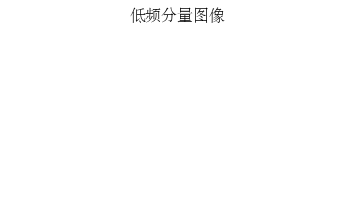

In [5]:
# 例5.22 小波变换示例
import pywt
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='STSong' #图形中显示汉字
plt.rcParams['font.size']=12

# img=cv.imread('E:/Pyhton数据挖掘/matlab/heben.jpg',0) #读取图像
original = pywt.data.camera()

#对img进行haar小波变换，分量分别是低频、水平高频、垂直高频、对角线高频
# cA,(cH,cV,cD)=pywt.dwt2(img,'haar')
#
# cA,(cH,cV,cD)=pywt.dwt2(img,'haar')
coeffs2 = pywt.dwt2(original, 'haar')

#小波变换之后，低频分量对应的图像
p1=plt.figure(figsize=(12,6),dpi=80) #第一幅子图，并确定画布大小
ax1=p1.add_subplot(2,2,1) #创建一个2行2列的子图，并开始绘制第一幅
plt.axis('off') #不显示坐标轴
plt.title('低频分量图像')
AA1=np.uint8(np.uint8(coeffs2/np.max(coeffs2)*25))
plt.imshow(AA1,'gray')
# plt.imshow(AA1,cmap=plt.cm.gray)

ax1=p1.add_subplot(2,2,2)
plt.axis('off')
plt.title('水平高频分量图像')
AA2=np.uint8(np.uint8(cA/np.max(cH)*255))
plt.imshow(AA2,'gray')
ax3=p1.add_subplot(2,2,3)
plt.title('垂直高频分量图像')
plt.axis('off')
AA3=np.uint8(np.uint8(cV/np.max(cH)*255))
# plt.imshow(AA3,'gray')
plt.imshow(AA3,plt.cm.gray)
ax4=p1.add_subplot(2,2,4)
plt.title('对角线高频分量图像')
plt.axis('off')
AA4=np.uint8(np.uint8(cD/np.max(cH)*255))
plt.imshow(AA4,'gray')
plt.show()

In [17]:
# 例5.22 小波变换示例
import pywt
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='STSong' #图形中显示汉字
plt.rcParams['font.size']=12
img=cv.imread('E:/Pyhton数据挖掘/matlab/5_22.jpg',0) #读取图像
#对img进行haar小波变换，分量分别是低频、水平高频、垂直高频、对角线高频
cA,(cH,cV,cD)=pywt.dwt2(img,'haar')
#小波变换之后，低频分量对应的图像
p1=plt.figure(figsize=(12,6),dpi=80) #第一幅子图，并确定画布大小
ax1=p1.add_subplot(2,2,1) #创建一个2行2列的子图，并开始绘制第一幅
plt.axis('off') #不显示坐标轴
plt.title('低频分量图像')
AA1=np.uint8(np.uint8(cA/np.max(cA)*255))
plt.imshow(AA1,'gray')
ax1=p1.add_subplot(2,2,2)
plt.axis('off')
plt.title('水平高频分量图像')
AA2=np.uint8(np.uint8(cA/np.max(cH)*255))
plt.imshow(AA2,'gray')
ax3=p1.add_subplot(2,2,3)
plt.title('垂直高频分量图像')
plt.axis('off')
AA3=np.uint8(np.uint8(cV/np.max(cH)*255))
plt.imshow(AA3,'gray')
ax4=p1.add_subplot(2,2,4)
plt.title('对角线高频分量图像')
plt.axis('off')
AA4=np.uint8(np.uint8(cD/np.max(cH)*255))
plt.imshow(AA4,'gray')
plt.show()

ValueError: Input array has fewer dimensions than the specified axes

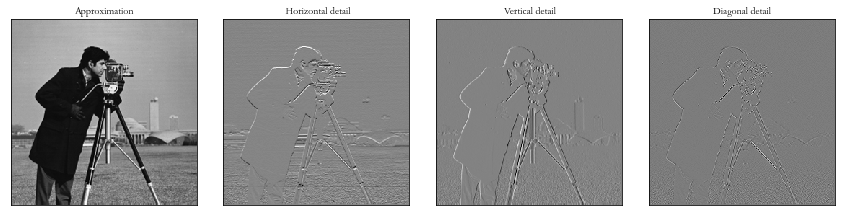

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [28]:
import pywt
x = [3, 7, 1, 1, -2, 5, 4, 6]
cA, cD = pywt.dwt(x,'haar')

y = pywt.idwt(cA, cD, 'haar')

print(cA)
print(cD)
print(y)

[7.07106781 1.41421356 2.12132034 7.07106781]
[-2.82842712  0.         -4.94974747 -1.41421356]
[ 3.  7.  1.  1. -2.  5.  4.  6.]


### 小波对象
#### 小波族和内置小波名称

- Wavelet对象实际上是一堆 DWT 特定数据的方便载体，例如正交镜像过滤器和与它们相关的一些一般属性。
- 首先让我们看一下创建Wavelet对象的方法。最简单和最方便的方法是使用名为 Wavelets 的内置函数。
- 这些小波被组织成称为小波族的组。最常用的家庭是：

In [13]:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

- 将wavelist()族名称作为参数传递的函数用于获取每个族中的小波名称列表。

In [14]:
for family in pywt.families():
     print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [29]:
# 要获得内置小波名称的完整列表，只需使用wavelist() 不带参数的。

#### 创建小波对象

In [31]:
# 现在，当我们知道所有名称时，让我们最终创建一个Wavelet对象：
w = pywt.Wavelet('db3')

#### 小波属性

- Wavelet对象带有一些有趣的信息
- 首先，让我们尝试打印一个Wavelet对象。这显示了有关其名称、家族名称和正交性和对称性等一些属性的简要信息

In [32]:
print(w)

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


- 但最重要的信息是用于离散小波变换的小波滤波器系数。这些系数可以通过dec_lo、和属性获得Wavelet.dec_hi， 它们分别对应于低通和高通分解滤波器以及低通和高通重构滤波器：rec_lorec_hi

In [33]:
# 例5.24 PCA()函数应用实例
import numpy as np
from sklearn.decomposition import PCA
X=np.array([[-1,2,66,-1],[-2,6,58,-1],[-3,8,45,-2],[1,9,36,1],[2,10,62,1],[3,5,83,2]])
pca=PCA(n_components=2) #降到2维
pca.fit(X) #训练
newX=pca.fit_transform(X) #降维后的数据
print(pca.explained_variance_ratio_) #输出贡献率
print(newX) #输出降维后的数据

[0.95713353 0.03398198]
[[  7.96504337   4.12166867]
 [ -0.43650137   2.07052079]
 [-13.63653266   1.86686164]
 [-22.28361821  -2.32219188]
 [  3.47849303  -3.95193502]
 [ 24.91311585  -1.78492421]]


In [34]:
import numpy as np
dictB = ['质量', '质量很好', '差',  '一般'] # 词典（网上有很多）
maxDictB = max([len(word) for word in dictB])
sen1='质量很好很好很好很好很好质量很好质量很好'
sen2='差差差差差差差差差差差差'
sen3='一般一般一般一般一般一般'
def cutB(sentence): #基于字典的逆向最大匹配中文分词
    result = []
    sentenceLen = len(sentence)
    while sentenceLen > 0:
        word = ''
        for i in range(maxDictB, 0, -1):
            piece = sentence[sentenceLen-i:sentenceLen]
            if piece in dictB:
                word = piece
                result.append(word)
                sentenceLen -= i
                break
        if word is '':
            sentenceLen -= 1
            result.append(sentence[sentenceLen])
    print(np.unique(result[::-1])) #去掉重复词
cutB(sen1)
cutB(sen2)
cutB(sen3)

['好' '很' '质量很好']
['差']
['一般']


<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\admin\AppData\Local\Temp/ipykernel_2876/3636846806.py:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if word is '':


## 5.6 数据变换与数据离散化

### 5.6.1 数据变换

#### 1. 特征二值化
    特征二值化的核心在于设定一个阈值，将特征与该阈值比较后，转焕为0或1（只考虑某个特征出现与否，不考虑出现次数、程度），它的目的是将连续数值细粒度的度量转化为粗粒度的度量。
    sklearn.preprocessing.Binarizer()是一种属于预处理模块的方法。它在离散连续特征值中起关键作用。常用形式为：
    Binarizer(threshold=0.0) 
    其中参数Threshol是给定的阈值（float），可选项，小于等于threshold的值映射为0，否则映射为1。缺省情况下，阈值为0.0。

In [8]:
# 例5.26 特征二值化示例
from sklearn.preprocessing import Binarizer
data=[[1,2,4],[1,2,6],[3,2,2],[4,3,8]]
binar=Binarizer(threshold=3) #将数值型数据转化为布尔型的二值数据
print(binar.fit_transform(data)) #对数据先进行拟合，然后标准化

[[0 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]]


#### 2. 特征归一化
    特征归一化也叫做数据无量纲化，主要包括：总和标准化、标准差标准化、极差标准化（§5.4.2）、极大值标准化（§5.4.3）。基于参数的模型或基于距离的模型，都需要进行特征归一化。

#### 3. 连续特征变换
    连续特征变换的常用方法有三种：基于多项式的数据变换、基于指数函数的数据变换、基于对数函数的数据变换。连续特征变换能够增加数据的非线性特征捕获特征之间的关系，有效提高模型的复杂度。

In [9]:
# 例5.27 多项式变换示例
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
X=np.arange(9).reshape(3,3)  #生成多项式
print(X)   
ploy=PolynomialFeatures(degree=2)  
print(ploy.fit_transform(X))
ploy=PolynomialFeatures(degree=3)  
print(ploy.fit_transform(X))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 1.  0.  1.  2.  0.  0.  0.  1.  2.  4.]
 [ 1.  3.  4.  5.  9. 12. 15. 16. 20. 25.]
 [ 1.  6.  7.  8. 36. 42. 48. 49. 56. 64.]]
[[  1.   0.   1.   2.   0.   0.   0.   1.   2.   4.   0.   0.   0.   0.
    0.   0.   1.   2.   4.   8.]
 [  1.   3.   4.   5.   9.  12.  15.  16.  20.  25.  27.  36.  45.  48.
   60.  75.  64.  80. 100. 125.]
 [  1.   6.   7.   8.  36.  42.  48.  49.  56.  64. 216. 252. 288. 294.
  336. 384. 343. 392. 448. 512.]]


In [11]:
# 例5.28 指数变换示例
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import load_iris
iris=load_iris()
print('原数据：\n',iris.data[0])
df= FunctionTransformer(np.exp)
df1=df.fit_transform(iris.data[0])
print('指数变换后的数据：\n',df1)

原数据：
 [5.1 3.5 1.4 0.2]
指数变换后的数据：
 [164.0219073   33.11545196   4.05519997   1.22140276]


In [12]:
# 例5.29 对数变换示例
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import load_iris
iris=load_iris()
print('原数据：\n',iris.data)
df= FunctionTransformer(log1p).fit_transform(iris.data)
print('对数变换后的数据：\n',df)

原数据：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

#### 4. 独热编码
    独热编码（One-Hot-coding）又称为one-hot编码，其方法是使用N位来对N个状态进行编码，一位代表一种状态。且只有该状态所在位为1，其他位都为0。

In [13]:
# 例5.30 独热编码示例
from sklearn.preprocessing import OneHotEncoder
data=[[1,0,3],[1,1,0],[0,2,1],[1,0,2]]
oneHotEn=OneHotEncoder(sparse=False)  #如果不加参数sparse=False,输出是稀疏的存储格式
oneHotEn.fit(data)
ans=oneHotEn.transform([[1,2,2]])
print(ans)

[[0. 1. 0. 0. 1. 0. 0. 1. 0.]]


### 5.6.2 数据离散化

#### 1.等宽法
    等宽法是将属性值分为具有相同宽度的区间，区间个数由数据本身的特点决定或由用户指定。。比如属性值在[0,60]之间，最小值为0，最大值为60，我们要将其分为3等分，则区间被划分为[0,20] 、[21,40] 、[41，60]，每个属性值对应属于它的那个区间。

Pandas的cut()函数能够实现等宽法离散化操作，常用形式为：
- pd.cut(X, bins, right=True, labels=None,include_lowest=False)
- 参数说明：
(1) X：一维数组，原始数据集。
(2) bins ：整数，如果填入整数n，则表示将X中的数值分成等宽的n份。
(3) right ：布尔值，默认为True表示包含最右侧的数值。
(4) labels 接收 list、array，表示离散化后各个类别的名称，默认为空。
    (5) include_lowest：布尔值，表示区间的左边是开还是闭，默认为false，也就是不包含区间左边。

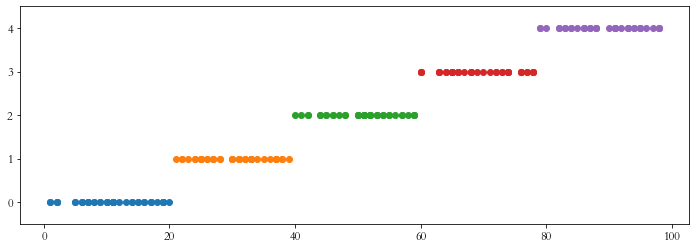

In [15]:
# 例5.31 利用等宽法进行数据离散化示例
# 随机产生200个人的年龄数据，然后通过等宽离散化，并进行可视化。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def cluster_plot(d, k):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(12,4))
    for j in range(0, k):
        plt.plot(data[d == j], [j for i in d[d == j]], 'o')
    plt.ylim(-0.5, k - 0.5)
    return plt
data = np.random.randint(1, 100, 200)
k = 5  #分为5个等宽区间
d1 = pd.cut(data, k, labels=range(k))  #等宽离散
cluster_plot(d1, k).show()

#### 2.等频法
    等频法是将相同数量的记录放在每个区间，保证每个区间的数量基本一致。即将属性值分为具有相同宽度的区间，区间的个数k根据实际情况来决定。比如有60个样本，我们要将其分为k=3部分，则每部分的长度为20个样本。优点是数据变为均匀分布，但是会更改原有的数据结构

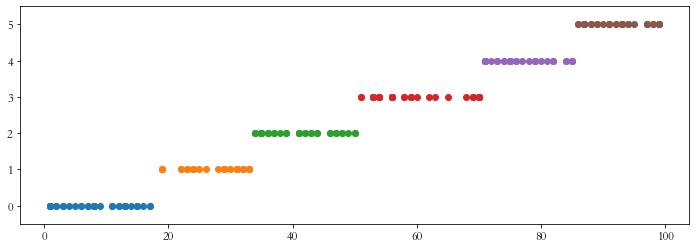

In [18]:
# 例5.32 利用等频法进行数据离散化示例
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 4))
    for j in range(0, k):
        plt.plot(data[d == j], [j for i in d[d == j]], 'o')
    plt.ylim(-0.5, k - 0.5)
    return plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = np.random.randint(1, 100, 200)
data = pd.Series(data)
k = 6
w = [1.0 * i / k for i in range(k + 1)]
w = data.describe(percentiles=w)[4:4 + k + 1]
w[0] = w[0] * (1 - 1e-10)
d4 = pd.cut(data, w, labels=range(k)) # 等频率离散化
cluster_plot(d4, k).show()